# The Iris dataset

![pandas logo](https://pandas.pydata.org/_static/pandas_logo.png)

## Table of contents
-  [Introduction](#intro)
-  [Imports Required](#impReq)
-  [Import Data](#impData)
    - [Viewing Data](#viewData)
-  [Summary Statistics](#sum)
-  [Plotting and Visualizing Data](#plotting)
-  [Evaluation of algorithms](#alg)
    - [Create Validation dataset ](#vData)
    - [Test Harness](#tHarn)
    - [Build Models](#bModel)
    - [Evaluate and select best model](#eModel)
-  [Predictions](#pred)
-  [References](#ref)

## Introduction <a id ="intro"></a>

In this notebook we will take a look at the Iris dataset which is now widely used as a data set for testing purposes in computer science. Many developers consider the classification of the iris dataset as the Hello World of Machine Learning.

The __Iris flower dataset__ is a specific set of information compiled by [Ronald Fisher](https://www.famousscientists.org/ronald-fisher/), a biologist, in the 1930s. It describes particular biological characteristics of various types of Iris flowers, specifically, the length and width of both pedals and the sepals, which are part of the flower’s reproductive system.

![Iris flowers](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

The Iris flower data set is now widely used as a data set for testing purposes in computer science. In this set three species of the Iris flower were used, the _Iris Versicolor_, _Iris Setosa_ and the _Iris Virginica_. For each species 50 samples were collected and measurements were taken of the sepal length, sepal width, petal length and petal width. Based on the 150 samples collected Ronald Fisher wrote a paper on a technique called [Linear Discriminant Analysis](https://machinelearningmastery.com/linear-discriminant-analysis-for-machine-learning/) devised a model to distinguish the species from each other.

This notebook will demonstrate what is known as __Supervised Learning__  using label data as we are trying to learn the relationship between the data (Iris measurements) and the outcome which is the species of Iris. This is in contrast to  __Unsupervised Learning__  with unlabeled data where we would only have the measurement data but not the  species.

For a deeper understanding of the Iris data set check out the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/iris).

## Imports Required <a id="impReq"></a>

In [1]:
# Import pandas for data visualization and data handling.
import pandas as pd

# Import Seaborn for data visualization.
import seaborn as sea
#sea.set_palette('husl')

# Import matplotlib for plotting graphs
import matplotlib.pyplot as plt

# Import numpy for mathematical operations
import numpy as np

# For Modelling data
from sklearn import metrics

from sklearn import model_selection
# Knn model
from sklearn.neighbors import KNeighborsClassifier 

# Split data
from sklearn.model_selection import train_test_split 

# Imports for predictions
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Ignore future warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Importing the Data set <a id="impData"></a>

Firstly we must import a copy of the Iris data set.

In [2]:
IrisDataset = pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")

### View The Data Set <a id="viewData"></a>

In [3]:
IrisDataset.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [4]:
IrisDataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


## Summary Statistics <a id="sum"></a>
Using some summary methods we can break down the data to get better glance at some of the values.

In [5]:
# View last 5 elements of data set
IrisDataset.tail(5)

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [6]:
# View first 5 elements of data set
IrisDataset.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
#  View a summary of each attribute
IrisDataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Plotting and Visualizing Data <a id="plotting"></a>

We can use the pairplot function from the Seaborn package to visualize the data in graph form. This helps to give a visual understanding of the spread of data.

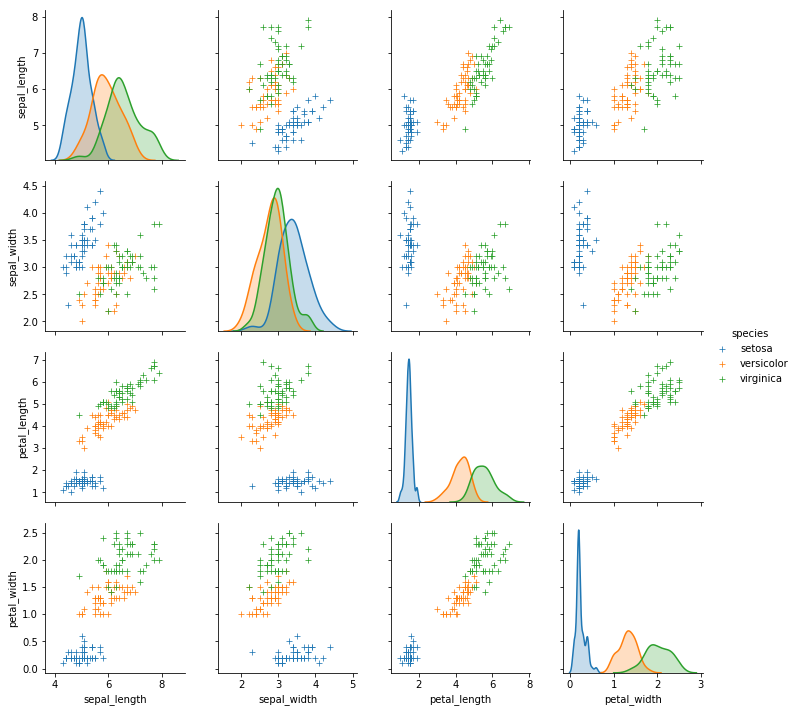

In [8]:

#graph =sea.pairplot(tempData,hue="species")
#graph =sea.pairplot(IrisDataset,hue="species")
#plt.show()
#graph = sea.pairplot(IrisDataset, hue='species')
#graph
graph = sea.pairplot(IrisDataset, hue='species',markers ='+')
plt.show()

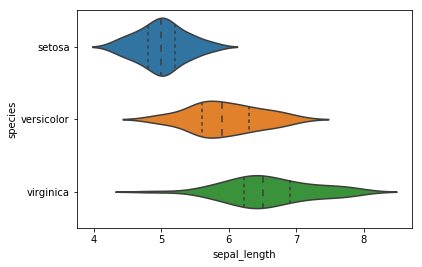

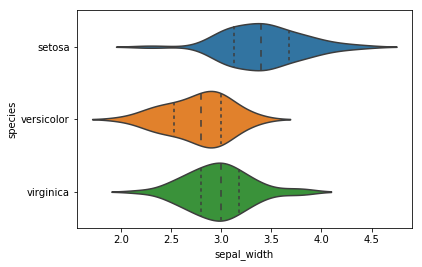

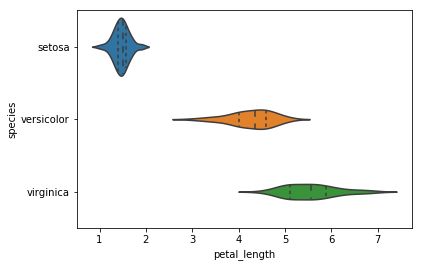

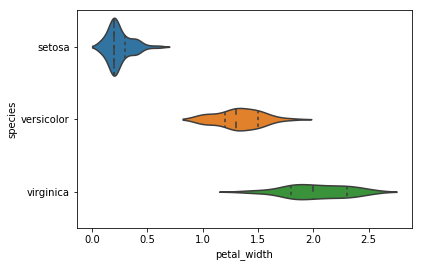

In [9]:
IrisDataset.groupby('species').size()
graph = sea.violinplot(y='species', x='sepal_length', data=IrisDataset, inner='quartile')
plt.show()
graph = sea.violinplot(y='species', x='sepal_width', data=IrisDataset, inner='quartile')
plt.show()
graph = sea.violinplot(y='species', x='petal_length', data=IrisDataset, inner='quartile')
plt.show()
graph = sea.violinplot(y='species', x='petal_width', data=IrisDataset, inner='quartile')
plt.show()

## Evaluation of algorithms <a id="alg"></a>
Now that we have seen how the data looks its time to create some models of the data and estimate their accuracy.
<br><br>
In this Section we are going to :
- Seperate a validation dataset.
- Set up test harness.
- Build models to predict species.
- Choose the best model.

### Create Validation dataset  <a id="vData"></a>
We need to be able to test if the models created are accurate. We will do this by splitting that dataset into two, 80% will be used to train the models and 20% will be held to use as a validation set.

In [10]:
# Seperate validation dataset
array = IrisDataset.values
X = array[:,0:4]
Y = array[:,4]

validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

print(X_train.shape)
print(Y_train.shape)
print(X_validation.shape)
print(Y_validation.shape)

(120, 4)
(120,)
(30, 4)
(30,)


We have now split the dataset.
- Training data  : _X_train_ and _Y_train_ for preparing models.
- Vaidation Data : _X_validation_ and _Y_validation_ .

### Test Harness  <a id="tHarn"></a>
To estimate the accuracy of models we will use 10-fold cross validation. This will allow us to return a percentage of correct predictions.

In [11]:
# Random seed
seed = 7
# scoring variable
scoring = 'accuracy'

### Build Models  <a id="bModel"></a>
We must now evaluate algorithms to decide which would be suitable for this problem. We will evaluate a combination of linear and non-linear algorithms.
<br><br>
Linear :
- Logistic Regression (LR)
- Linear Discriminant Analysis (LDA)
<br><br>

Non-Linear :
- K-Nearest Neighbors (KNN).
- Classification and Regression Trees (CART).
- Gaussian Naive Bayes (NB).
- Support Vector Machines (SVM).


In [12]:
# Create an array of models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

### Evaluate and select best model  <a id="eModel"></a>

In [13]:
# evaluate each model in the array
results = []
names = []

for name, model in models:
    # split dataset into 10 parts, train on 9 and test on 1 
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    
    results.append(cv_results)
    names.append(name)
    
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    
    # display accuracy result
    print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


Looking at the above results it is clearly evident that K-NearestNeighbours performs more accurately than the other algorithms. For this reason we will generate predictions using the KNN algorithm.

## Prediction <a id="pred"></a>
Firstly we must  get an idea of the accuracy of the model in our validation set. This will give us a final check of the accuracy of our model.

In [14]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()

# Fit training data to our model
knn.fit(X_train, Y_train)

# generate a prediction using the test set
predictions = knn.predict(X_validation)
print(metrics.accuracy_score(Y_validation, predictions))
print(metrics.confusion_matrix(Y_validation, predictions))
print(metrics.classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       0.85      0.92      0.88        12
   virginica       0.90      0.82      0.86        11

   micro avg       0.90      0.90      0.90        30
   macro avg       0.92      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



We can see from above that the model is accurate. We can now input values and and let the and algorithms make a prediction. For this example we will input 5.1,3.5,1.4,0.2 as we know this to be a Iris-Setosa.

In [15]:
knn.predict([[5.1,3.5,1.4,0.2]])

array(['setosa'], dtype=object)

The algorithm has performed correctly and predicted that this was indeed a Setosa.

## References <a id="ref"></a>

- [Linear Discriminant Analysis](https://machinelearningmastery.com/linear-discriminant-analysis-for-machine-learning/)
- [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/iris)
- [Making predictions](https://machinelearningmastery.com/machine-learning-in-python-step-by-step/)
- [KNN](https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/)
- [Seaborn](https://seaborn.pydata.org)